import libraries 

In [32]:
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px

read dataset

In [65]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

train

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

In [66]:
print(f'Are Train and Test data identical ? : {train.shape[0] == test.shape[0]}')

Are Train and Test data identical ? : True


add image_path col for dataset

In [74]:
base_path='input/images/'
def generate_image_path(image_id):
    return f"{base_path}{image_id}.jpg"

# apply for data
train['img_path'] = train['image_id'].apply(generate_image_path)
test['img_path'] = test['image_id'].apply(generate_image_path)

# EDA

resolution

In [75]:
train_img = mpimg.imread(train.loc[0, 'img_path'])
test_img = mpimg.imread(test.loc[0, 'img_path'])


print(f"Train image's resolution: {train_img.shape}")
print(f"Test image's resolution: {test_img.shape}")

Train image's resolution: (1365, 2048, 3)
Test image's resolution: (1365, 2048, 3)


In [76]:
def get_image_resolutions(df):
    resolutions = []
    for i, row in df.iterrows():
        img = mpimg.imread(row['img_path'])
        resolutions.append(img.shape)
    return resolutions

train_resolutions = get_image_resolutions(train)
test_resolutions = get_image_resolutions(test)

unique_train_res = set(train_resolutions)
unique_test_res = set(test_resolutions)

print(f"\nUnique train image resolutions: {unique_train_res}")
print(f"Unique test image resolutions: {unique_test_res}")


Unique train image resolutions: {(1365, 2048, 3), (2048, 1365, 3)}
Unique test image resolutions: {(1365, 2048, 3), (2048, 1365, 3)}


show number of samples for each disease

In [1]:
df_counts = train[['healthy', 'multiple_diseases', 'rust', 'scab']].sum().reset_index(name='count')
df_counts.columns = ['class', 'count']

# plot
fig = px.bar(df_counts, x='class', y='count', title='Number of samples for each disease class', text='count')

# display infor 
fig.update_traces(marker_color='teal',
                  textposition='outside',
                  hovertemplate='<b>%{x}</b><br>count: %{y}<extra></extra>')

fig.update_layout(yaxis_title='Number of Samples', xaxis_title='Disease Class', template='plotly_white')

fig.show()


NameError: name 'train' is not defined

filtering

In [37]:
healthy_images = train[train['healthy'] == 1]
multiple_diseases_images = train[train['multiple_diseases'] == 1]
rust_images = train[train['rust'] == 1]
scab_images = train[train['scab'] == 1]

In [43]:
def display_images(images, num_images=8, num_cols=4):
    
    images_to_show = images['img_path'].head(num_images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(15, num_rows * 4))

    for i, path in enumerate(images_to_show):
        img = mpimg.imread(path)
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

healthy

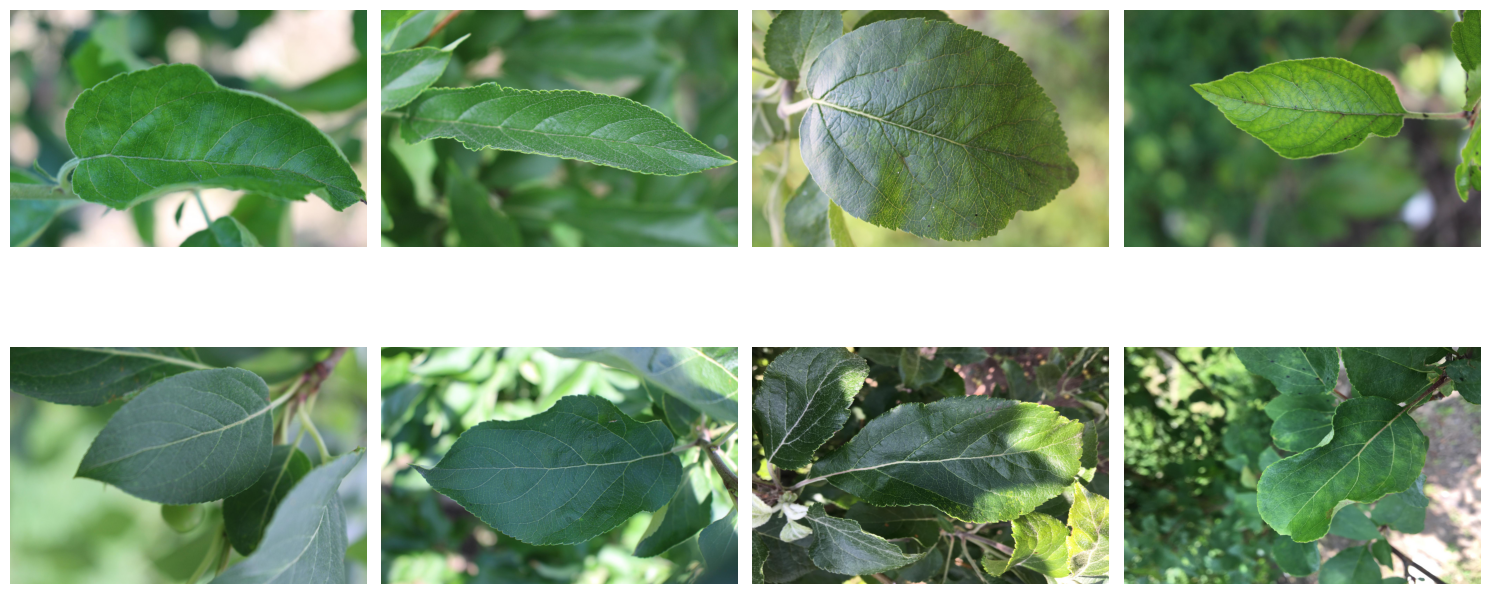

In [44]:
display_images(healthy_images)

multiple disease

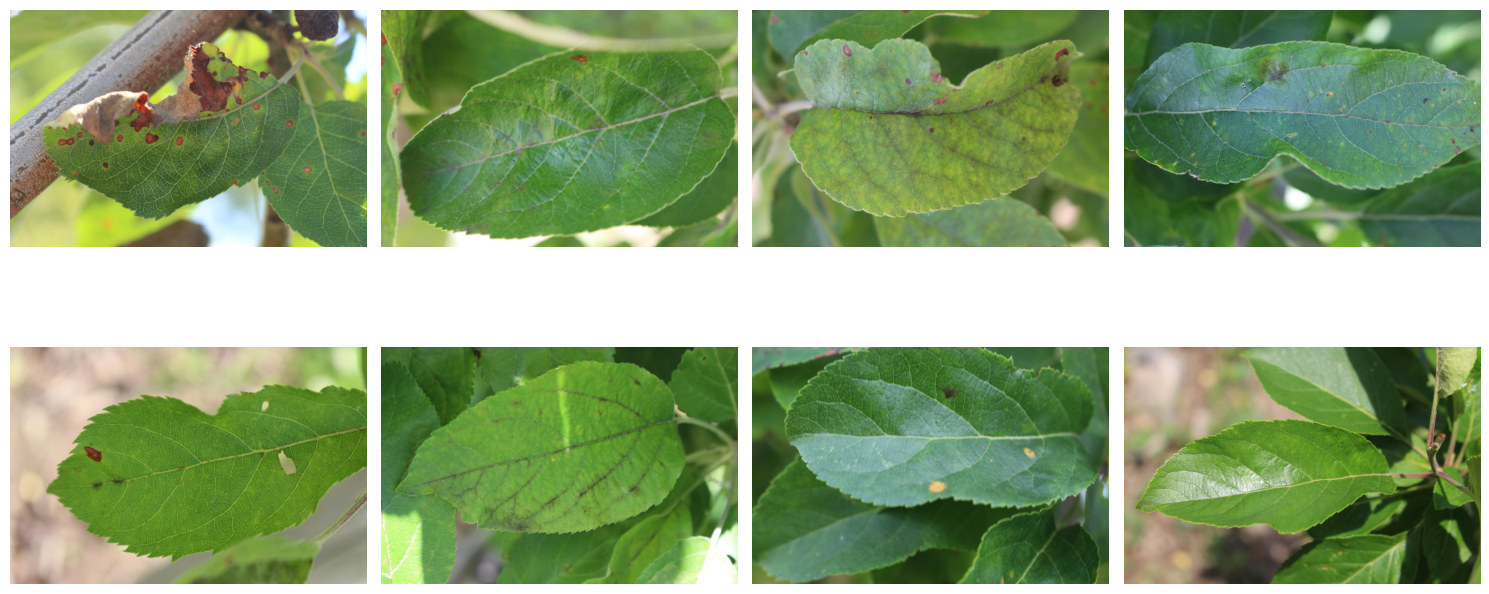

In [45]:
display_images(multiple_diseases_images)

rust

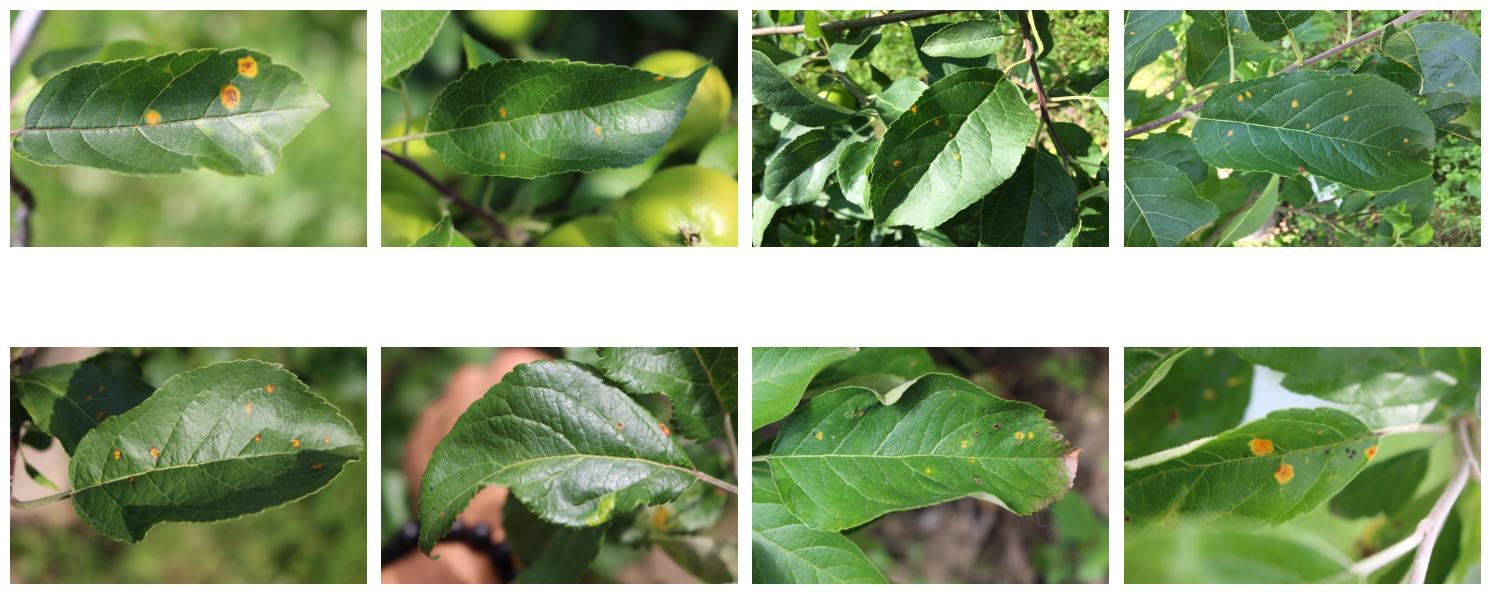

In [46]:
display_images(rust_images)

scab

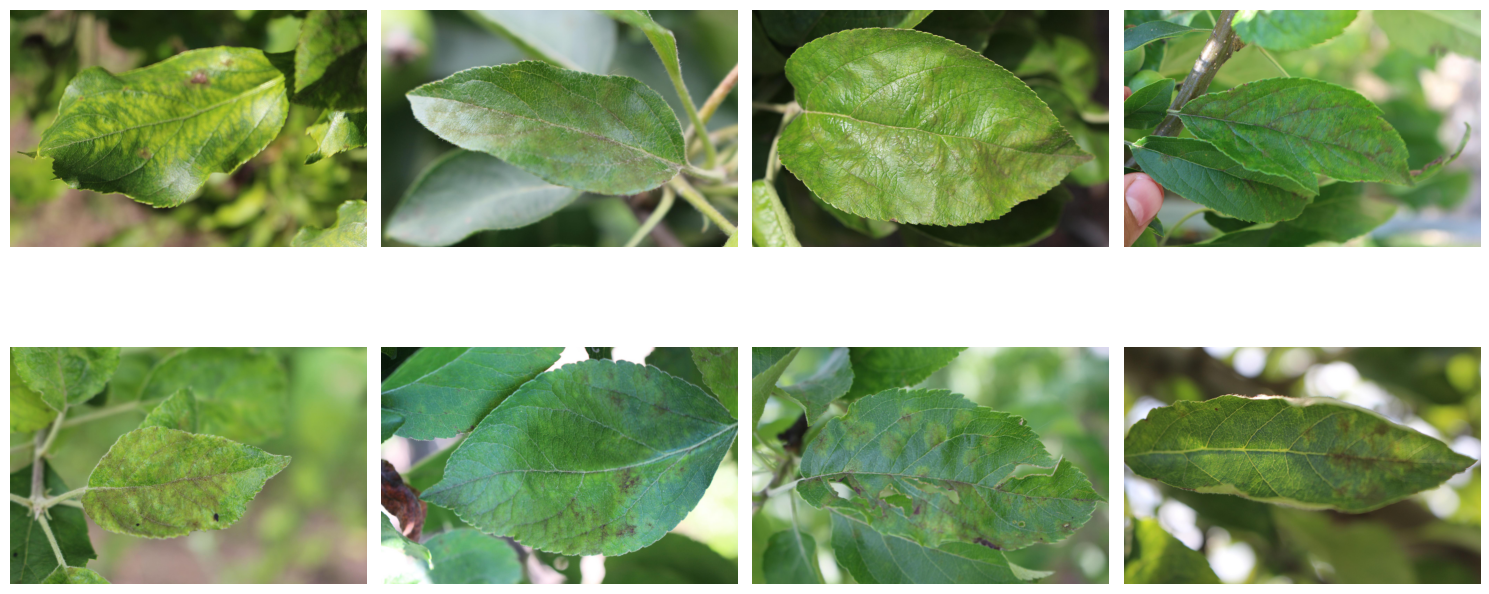

In [47]:
display_images(scab_images)